In [3]:
import pandas as pd


tweets="data/file_name.csv"
tweets_df = pd.read_csv(tweets)
tweets_df.head()

,time,id,handle,text,is_retweet,original_author,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,9/28/2016 0:22,7.809260e+17,HillaryClinton,The question in this election Who can put the ...,False,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,9/27/2016 23:08,7.809070e+17,HillaryClinton,If we stand together theres nothing we cant do...,False,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
2,9/27/2016 22:30,7.808970e+17,HillaryClinton,Both candidates were asked about how theyd con...,False,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN
3,9/27/2016 22:13,7.808930e+17,realDonaldTrump,Join me for a 3pm rally tomorrow at the MidAme...,False,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,True,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN
4,9/27/2016 21:35,7.808840e+17,HillaryClinton,This election is too important to sit out Go t...,False,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [13]:
#only take handle and text columns
new_df=tweets_df[['handle','text']]

new_df.head()

,handle,text
0,HillaryClinton,The question in this election Who can put the ...
1,HillaryClinton,If we stand together theres nothing we cant do...
2,HillaryClinton,Both candidates were asked about how theyd con...
3,realDonaldTrump,Join me for a 3pm rally tomorrow at the MidAme...
4,HillaryClinton,This election is too important to sit out Go t...


In [5]:
#convert handle into label 0 or 1
mapping = {'realDonaldTrump': 0, 'HillaryClinton': 1}

new_df2=new_df.replace({'handle': mapping})

new_df2.head()

,handle,text
0,1,The question in this election Who can put the ...
1,1,If we stand together theres nothing we cant do...
2,1,Both candidates were asked about how theyd con...
3,0,Join me for a 3pm rally tomorrow at the MidAme...
4,1,This election is too important to sit out Go t...


In [15]:
#drop any null colomuns
new_df2drop=new_df.dropna()
new_df2drop

,handle,text
0,HillaryClinton,The question in this election Who can put the ...
1,HillaryClinton,If we stand together theres nothing we cant do...
2,HillaryClinton,Both candidates were asked about how theyd con...
3,realDonaldTrump,Join me for a 3pm rally tomorrow at the MidAme...
4,HillaryClinton,This election is too important to sit out Go t...
...,...,...
5643,realDonaldTrump,lilredfrmkokomo realDonaldTrump My Facebook Gr...
5644,realDonaldTrump,marybnall01 realDonaldTrump watched lowell mas...
5645,realDonaldTrump,ghosthunter_lol Iowa key endorsement for realD...
5646,realDonaldTrump,iLoveiDevices EdwinRo47796972 happyjack225 Fox...


In [5]:
#use below code to download and install NLTK package

#import nltk
#nltk.download()

In [7]:
#remove stopwords
from nltk.corpus import stopwords

def no_user_alpha(tweet):
        clean_mess = [word for word in tweet.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    
new_df2drop['cleantext']=new_df2drop['text'].apply(lambda x:no_user_alpha(x))

new_df2drop['cleantext']=new_df2drop['cleantext'].apply(lambda x:" ".join(x))

new_df2drop
   



C:\Users\Nabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Nabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,handle,text,cleantext
0,1,The question in this election Who can put the ...,question election put plans action make life b...
1,1,If we stand together theres nothing we cant do...,stand together theres nothing cant Make sure y...
2,1,Both candidates were asked about how theyd con...,candidates asked theyd confront racial injusti...
3,0,Join me for a 3pm rally tomorrow at the MidAme...,Join 3pm rally tomorrow MidAmerica Center Coun...
4,1,This election is too important to sit out Go t...,election important sit Go make sure youre regi...
...,...,...,...
5643,0,lilredfrmkokomo realDonaldTrump My Facebook Gr...,lilredfrmkokomo realDonaldTrump Facebook Group...
5644,0,marybnall01 realDonaldTrump watched lowell mas...,marybnall01 realDonaldTrump watched lowell mas...
5645,0,ghosthunter_lol Iowa key endorsement for realD...,ghosthunter_lol Iowa key endorsement realDonal...
5646,0,iLoveiDevices EdwinRo47796972 happyjack225 Fox...,iLoveiDevices EdwinRo47796972 happyjack225 Fox...


In [34]:
new_df2drop.groupby(by=["handle"]).count()

,text
handle,
HillaryClinton,2556
realDonaldTrump,3089


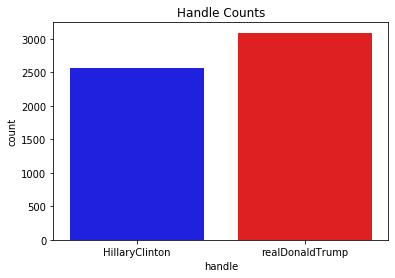

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

count_tweets = new_df2drop[['handle','text']]

color= ['#0000ff', '#ff0000']
fig2 = sns.countplot(x= 'handle',data = count_tweets, palette=color)
#fig2 = count_tweets.sort_values(['Count']).reset_index(drop=True)

plt.title('Handle Counts')
plt.ylabel('count')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

In [29]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each